# Analisis Exploratorio - House Prices

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. cargamos Datos

In [45]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
salesPrice = dataset["SalePrice"]
salesPrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [47]:
dataset["SalePrice"].mean()

180921.19589041095

In [48]:
dataset["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [49]:
# validacion de continuadad de variable
# dado a que ha mas de 30, es una variable continua
len(dataset["SalePrice"].unique())

663

<function matplotlib.pyplot.show(close=None, block=None)>

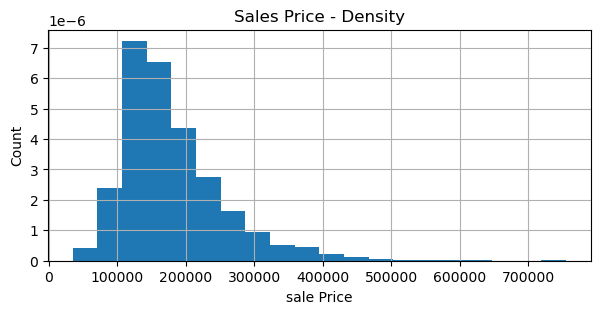

In [50]:
#sns.displot(dataset["salePrice"])
plt.figure(figsize=(7,3))
dataset["SalePrice"].hist(bins=20, density=True)
plt.title("Sales Price - Density")
plt.xlabel("sale Price")
plt.ylabel("Count")
plt.show
    

In [51]:
#sesgo
dataset["SalePrice"].skew()

1.8828757597682129

In [52]:
#curtosis
dataset["SalePrice"].kurt()

6.536281860064529

In [60]:
# variables continuas
continuas = []
discretas = []
categoricas = []

for colName in dataset.columns:
    valores = dataset[colName]
    if((valores.dtype == "int64") or (valores.dtype == "float64")):
        if(len(valores.unique())>30):
            continuas.append(colName)
        else:
            discretas.append(colName)
    else:
        categoricas.append(colName)

In [61]:
dataset[["LotFrontage", "SalePrice"]].corr().iloc[0,1]

0.35179909657067737

#Variables Continuas Vrs Target

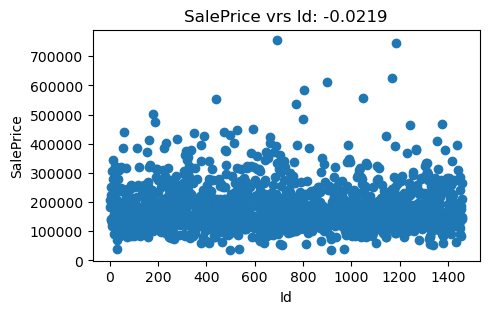

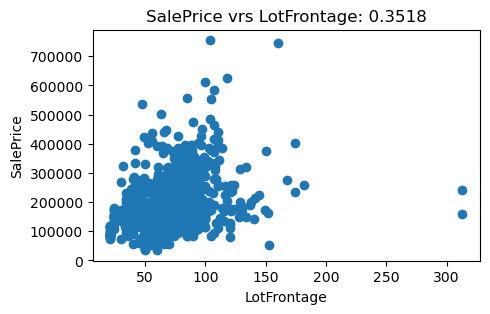

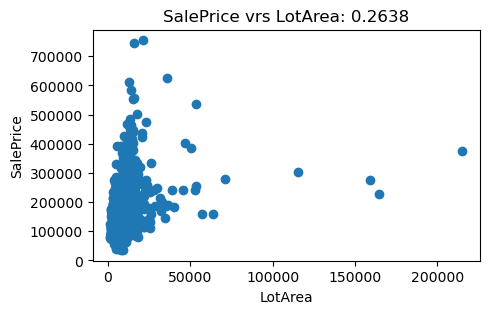

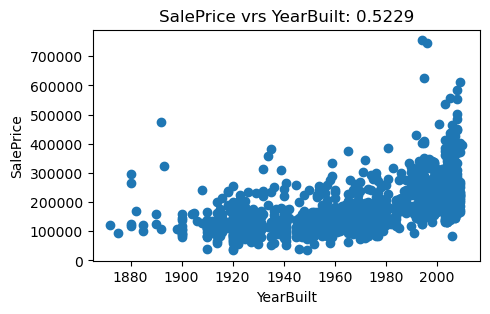

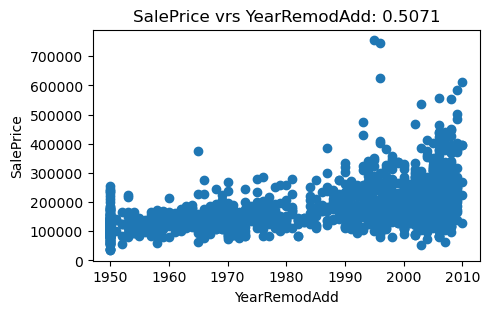

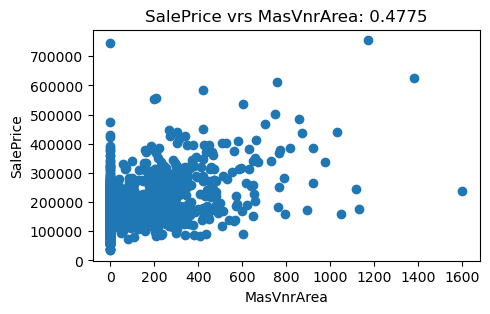

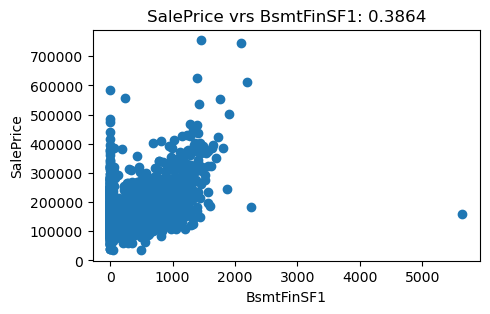

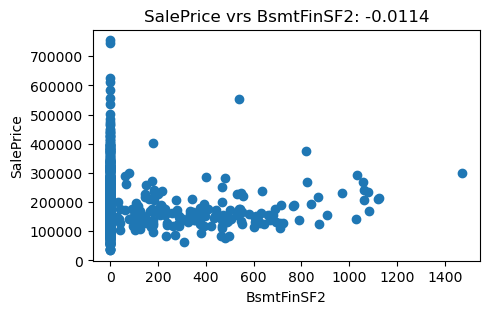

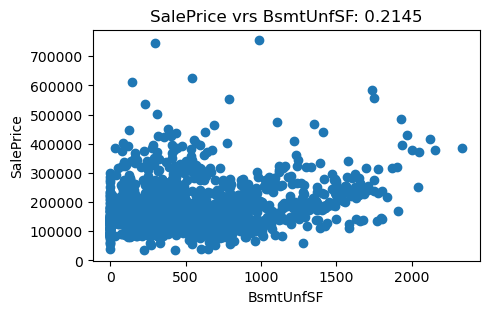

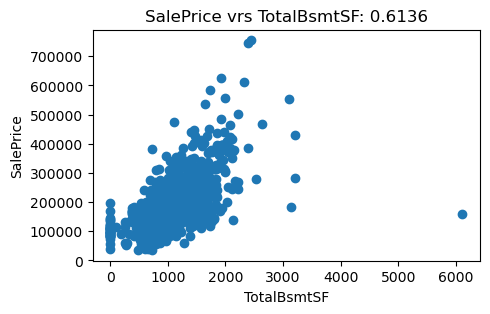

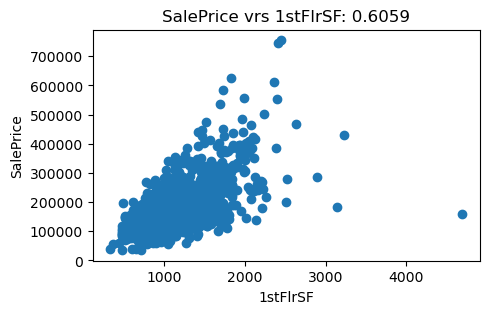

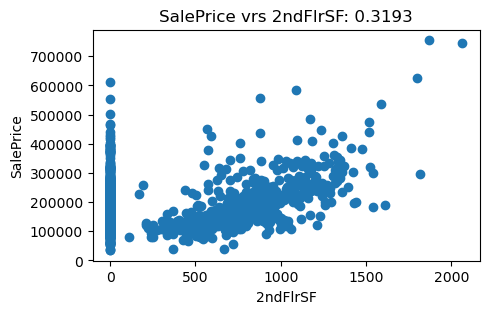

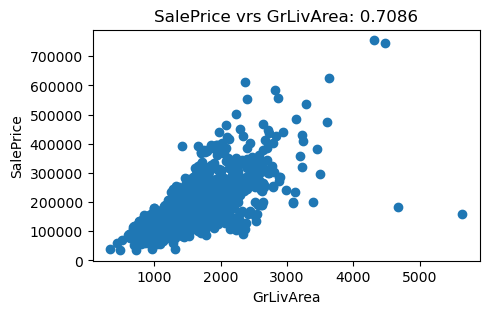

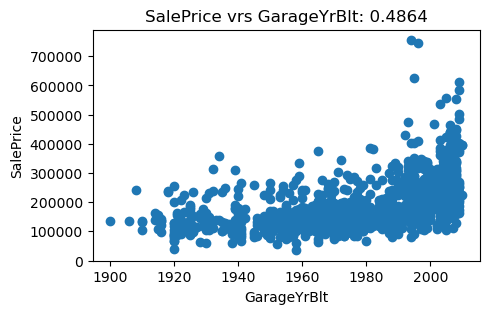

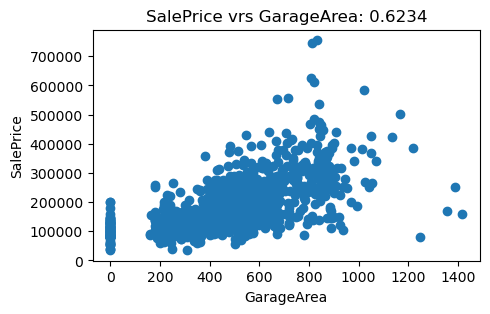

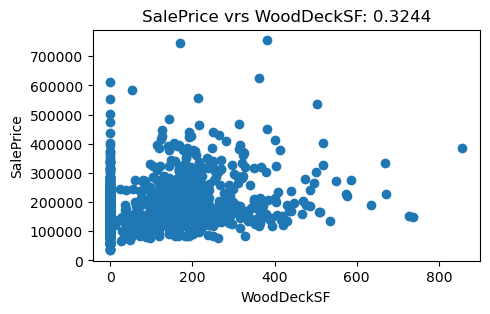

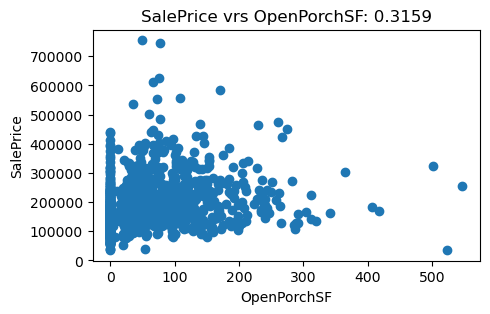

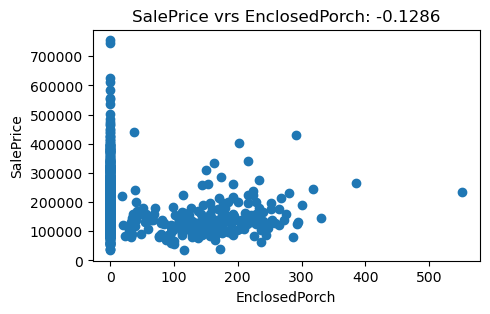

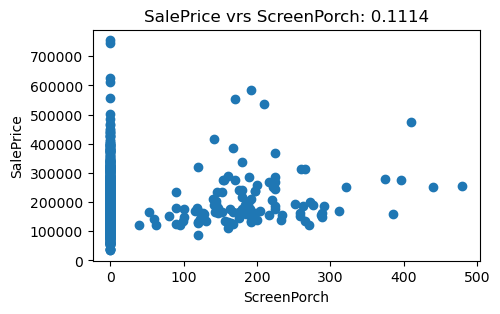

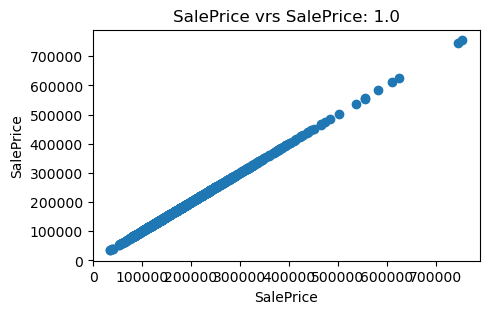

In [62]:
target = "SalePrice"

for colName in continuas:
    correlacion = round(dataset[[colName, target]].corr().iloc[0,1],4)
    plt.figure(figsize=(5,3))
    plt.scatter(dataset[colName], dataset[target])
    plt.xlabel(colName)
    plt.ylabel(target)
    plt.title(target + " vrs " + colName + ": " + str(correlacion))
    plt.show()

#variables Categoricas vs Target

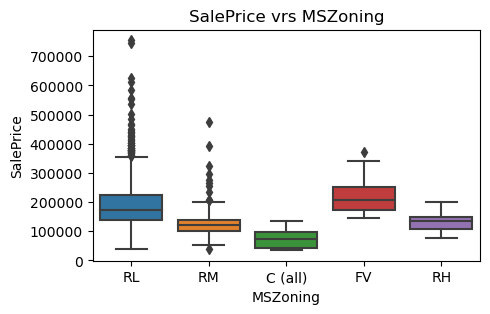

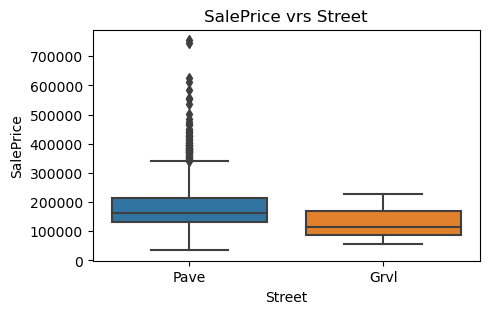

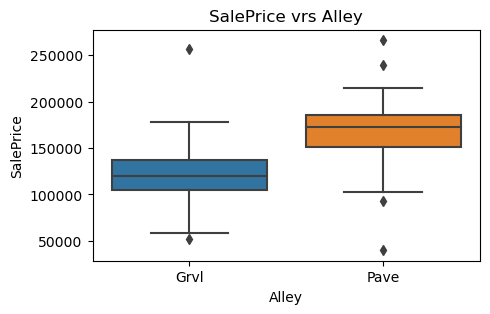

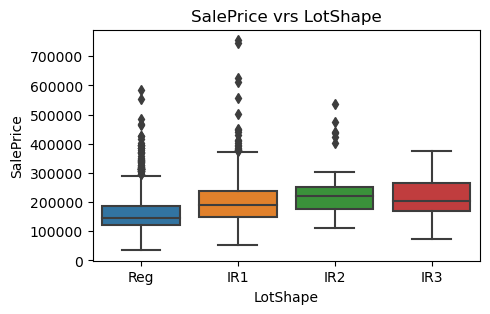

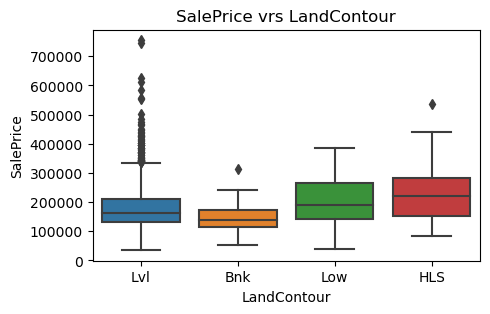

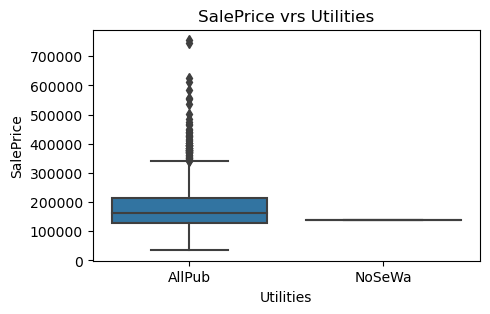

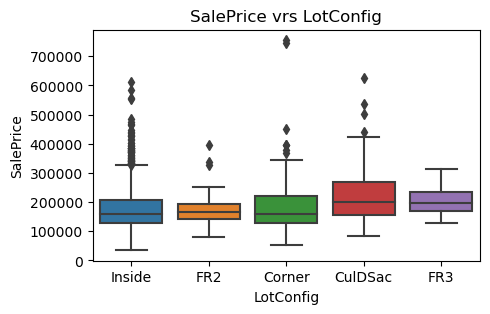

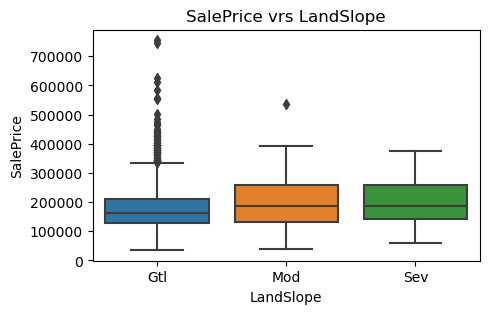

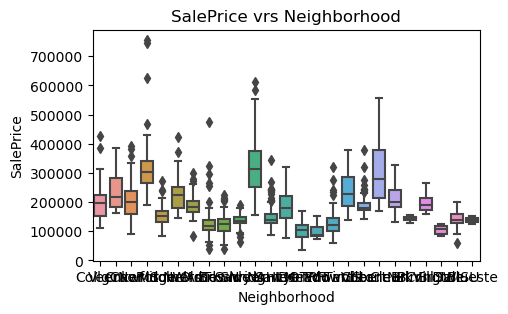

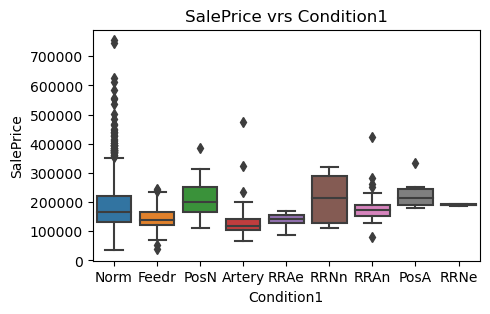

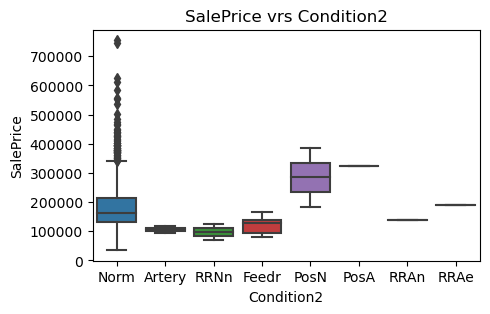

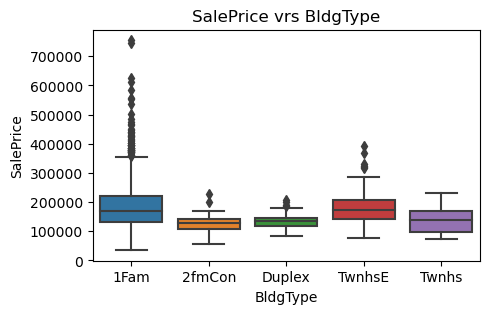

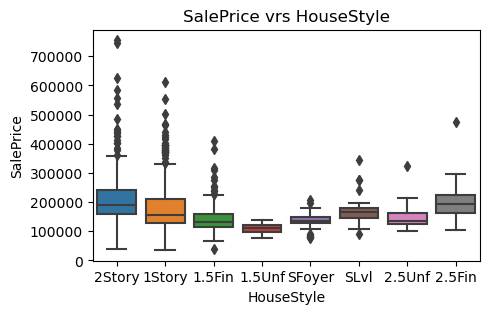

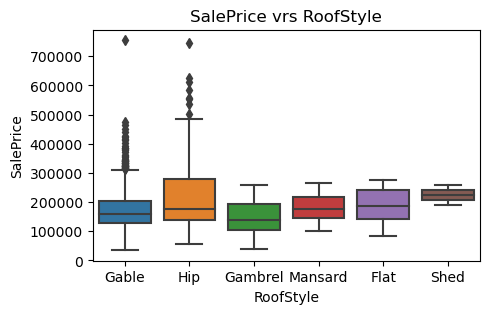

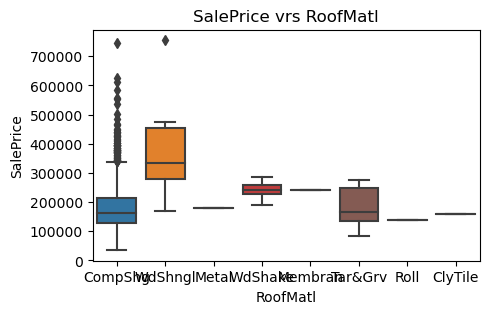

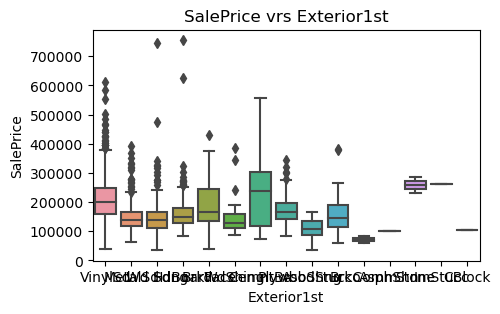

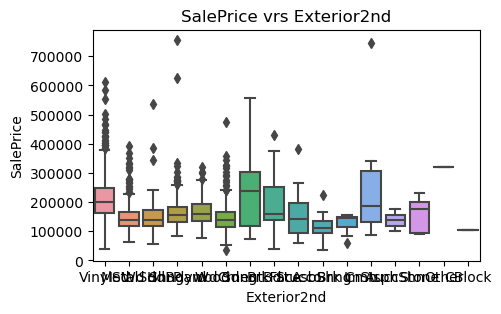

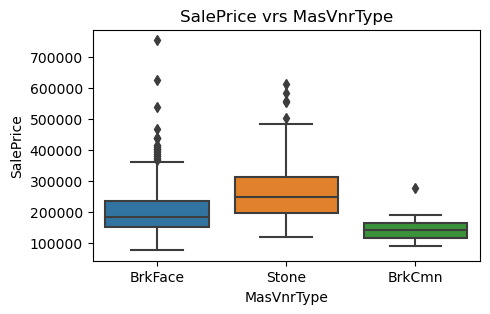

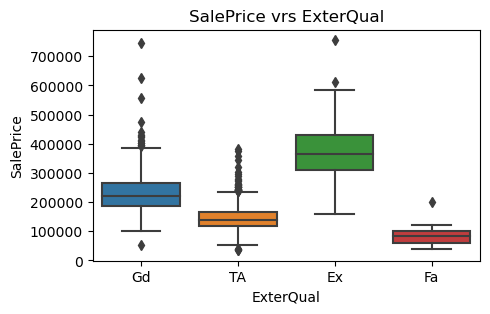

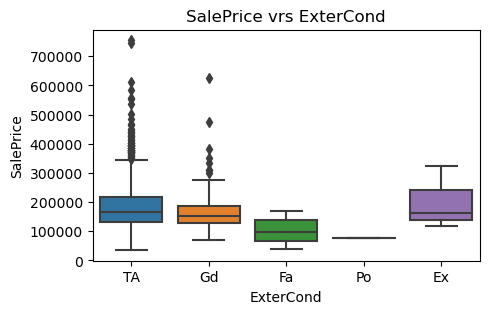

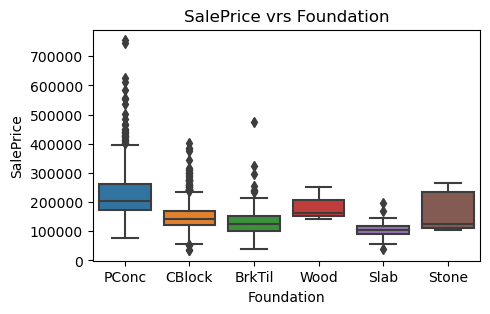

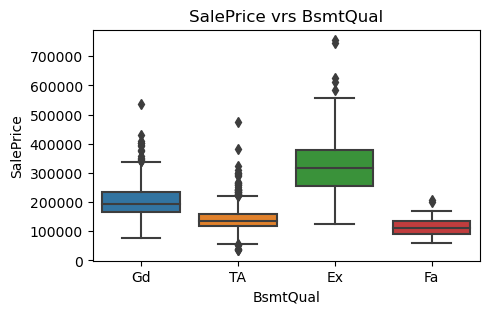

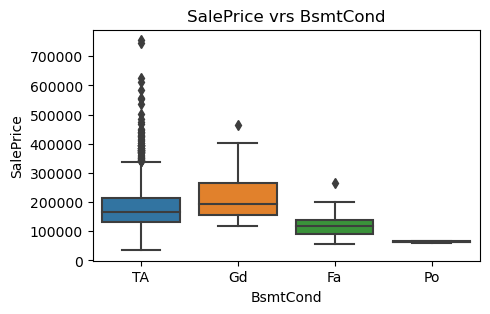

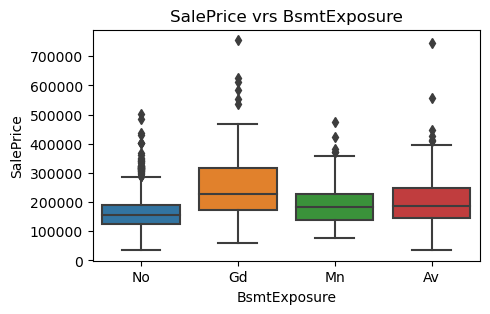

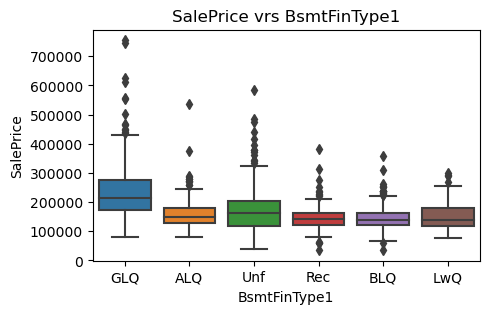

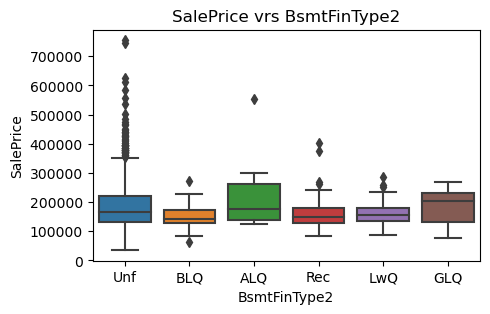

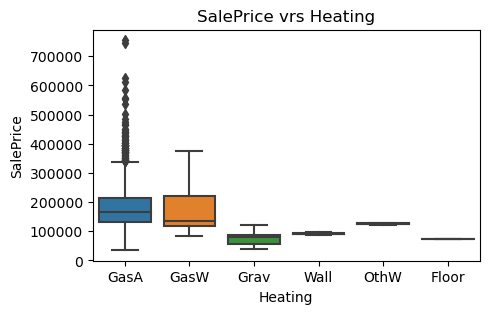

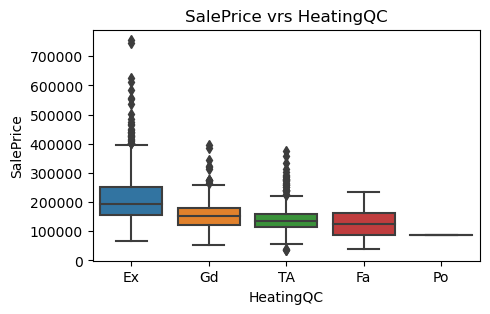

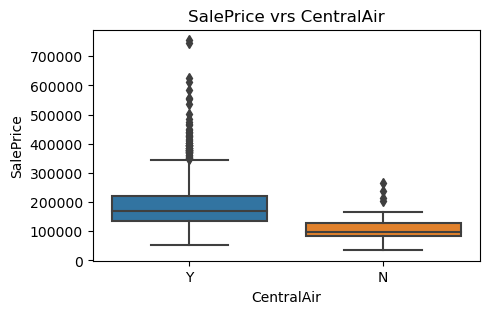

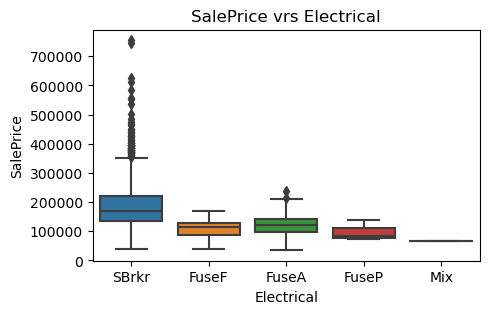

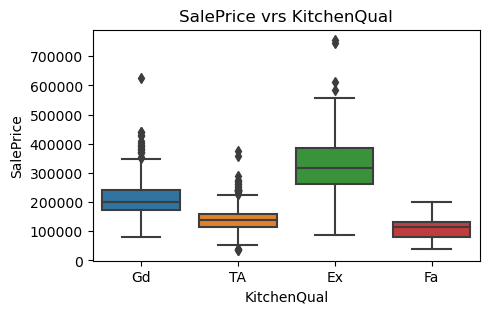

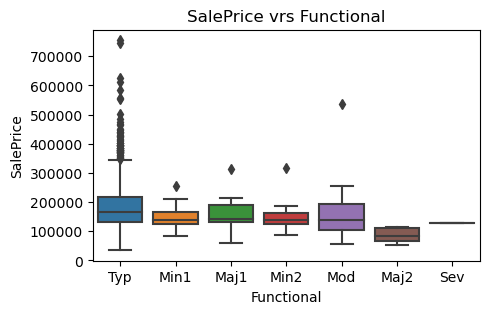

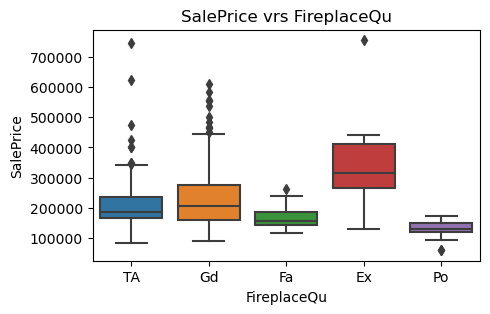

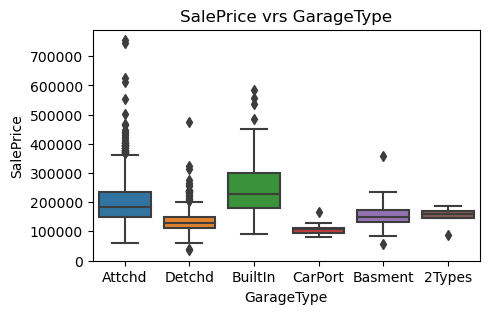

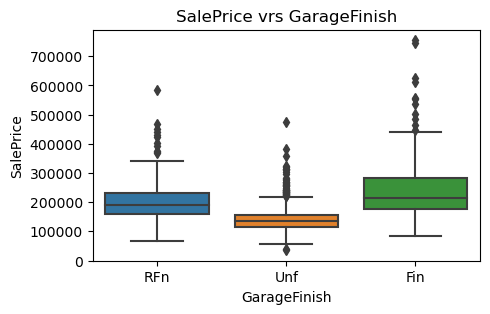

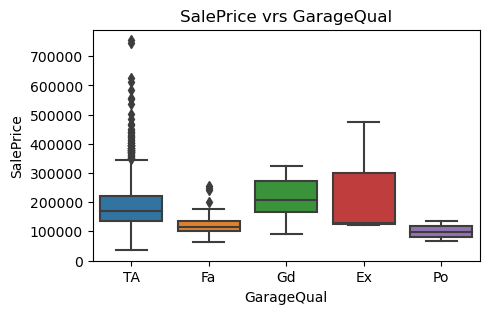

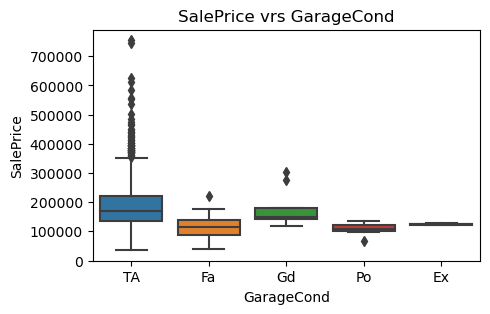

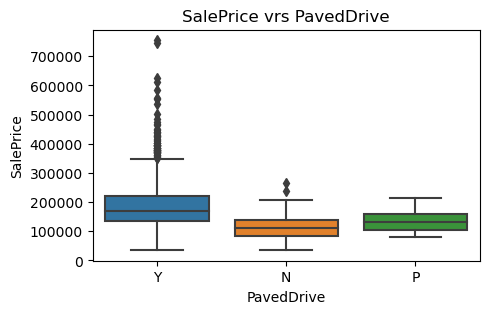

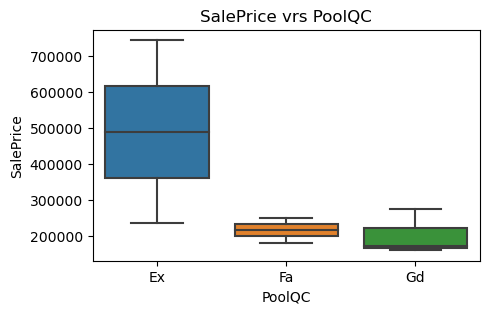

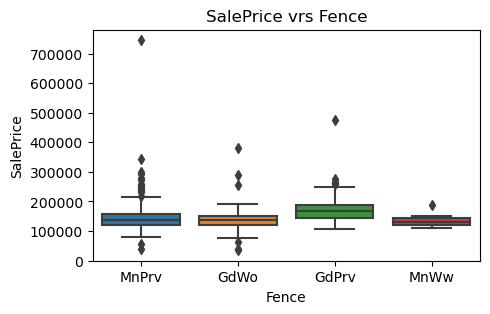

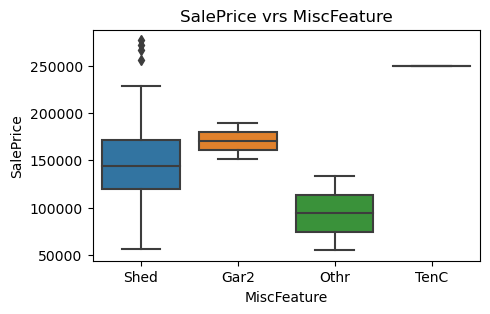

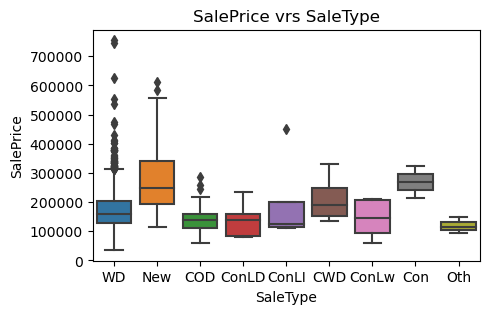

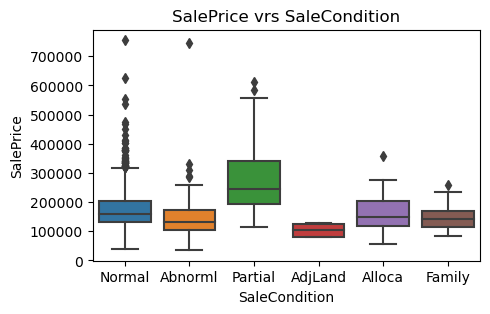

In [66]:
target = "SalePrice"

for colName in categoricas:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=colName, y=target, data=dataset)
    plt.xlabel(colName)
    plt.ylabel(target)
    plt.title(target + " vrs " + colName)
    plt.show()